The dataset I used consisted of over 1.2 lakh rows of raw sales data from an e-commerce business.It included detailed fields such as order ID, date, fulfillment type, sales channel, SKU, product category, size, courier status, quantity, currency, amount, and shipping details like city, state, and country. The data was messy, containing missing values, inconsistent formatting, and mixed data types. In addition to sales data, I worked with separate datasets for platform-wise pricing comparisons and inventory status, including columns like MRP across platforms, discounts, stock levels, and size availability—providing a comprehensive view of the business.

In [1]:
# import libraries 
import pandas as pd
import numpy as np 
import warnings
warnings.filterwarnings('ignore') 

In [2]:
# import datasets
dff = pd.read_csv("Amazon_Report.csv")
dff2 = pd.read_csv("May-2022.csv")
dff3 = pd.read_csv("Sale Report.csv")  

In [3]:
# convert it into dataframe
df1 = pd.DataFrame(dff)
df2 = pd.DataFrame(dff2)
df3 = pd.DataFrame(dff3)

                                                             DATA CLEANING 

In [4]:
#  Unwanted columns 
columns_to_drop = [
    'Order ID',         
    'ship-postal-code',
    'promotion-ids',
    'Unnamed: 22',       
    'fulfilled-by',      
    'Catalog',
    'Design No.'
]

In [5]:
# Droping Unwanted columns 
for df in [df1, df2, df3]:
    df.drop(columns=[col for col in columns_to_drop if col in df.columns], 
            inplace=True, 
            errors='ignore')

In [ ]:
# droping null values from each table 

In [6]:
null_counts = df1.isnull().sum()
null_counts

index                    0
Date                     0
Status                   0
Fulfilment               0
Sales Channel            0
ship-service-level       0
Style                    0
SKU                      0
Category                 0
Size                     0
ASIN                     0
Courier Status        6872
Qty                      0
currency              7795
Amount                7795
ship-city               33
ship-state              33
ship-country            33
B2B                      0
dtype: int64

In [7]:
# table df1 , df2 , df3
df1 = df1.dropna()
df2 = df2.dropna()
df3 = df3.dropna()

In [ ]:
# Removing dublicates from each tables 

In [8]:
df1["index"].drop_duplicates(inplace=True)
df1["index"].duplicated().sum()

0

In [9]:
df2["index"].drop_duplicates(inplace=True)
df2["index"].duplicated().sum()

0

In [10]:
df2 = df2[df2['Category'] != 'Nill']

In [11]:
df3["index"].drop_duplicates(inplace=True)
df3["index"].duplicated().sum()

0

In [ ]:
# fixing data types 

In [12]:
# columns to fix 
numeric_cols = [
    'Qty', 
    'Amount', 
    'Weight', 
    'TP',
    'MRP Old', 
    'Final MRP Old', 
    'Ajio MRP',
    'Amazon MRP', 
    'Amazon FBA MRP',
    'Flipkart MRP', 
    'Limeroad MRP',
    'Myntra MRP', 
    'Paytm MRP',
    'Snapdeal MRP',  
    'Stock',
    'index'
]

In [13]:
# for table df1
for col in numeric_cols:
    if col in df1.columns:
        df1[col] = pd.to_numeric(df1[col], errors='coerce') 

In [14]:
# for table df2
for col in numeric_cols:
    if col in df2.columns:
        df2[col] = pd.to_numeric(df2[col], errors='coerce') 

In [15]:
# for date 
df1['Date'] = pd.to_datetime(df1['Date'])

In [16]:
# Column Names Standardization
df1.columns = df1.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('.', '')
df2.columns = df2.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('.', '')
df3.columns = df3.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('.', '')

In [17]:
df1.info()
df2.info()
df3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 116016 entries, 1 to 128974
Data columns (total 19 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   index               116016 non-null  int64         
 1   date                116016 non-null  datetime64[ns]
 2   status              116016 non-null  object        
 3   fulfilment          116016 non-null  object        
 4   sales_channel       116016 non-null  object        
 5   ship-service-level  116016 non-null  object        
 6   style               116016 non-null  object        
 7   sku                 116016 non-null  object        
 8   category            116016 non-null  object        
 9   size                116016 non-null  object        
 10  asin                116016 non-null  object        
 11  courier_status      116016 non-null  object        
 12  qty                 116016 non-null  int64         
 13  currency            116016 non-nul

In [18]:
df1.head()

,index,date,status,fulfilment,sales_channel,ship-service-level,style,sku,category,size,asin,courier_status,qty,currency,amount,ship-city,ship-state,ship-country,b2b
1,1,2022-04-30,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,3XL,B09K3WFS32,Shipped,1,INR,406.0,BENGALURU,KARNATAKA,IN,False
2,2,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,XL,B07WV4JV4D,Shipped,1,INR,329.0,NAVI MUMBAI,MAHARASHTRA,IN,True
4,4,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,Top,3XL,B098714BZP,Shipped,1,INR,574.0,CHENNAI,TAMIL NADU,IN,False
5,5,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,SET264,SET264-KR-NP-XL,Set,XL,B08YN7XDSG,Shipped,1,INR,824.0,GHAZIABAD,UTTAR PRADESH,IN,False
6,6,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,J0095,J0095-SET-L,Set,L,B08CMHNWBN,Shipped,1,INR,653.0,CHANDIGARH,CHANDIGARH,IN,False


NOTE: we cannot merge the table because of in matching rows , and no common column values , so we need to analyse the data sepratly ,but if there was a common column present then we will merge it in this way:

In [19]:
# Merging df1 and df2 first, then  result with df3, then df4
df = pd.merge(df1, df2, on='index', how='outer')
df = pd.merge(df, df3, on='index', how='outer')

In [20]:
df.shape

(117043, 39)

                                               Exploratory Data Analysis

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [ ]:
  # Amazon sales table analyses

                                         Identify monthly revenue trends and growth opportunities

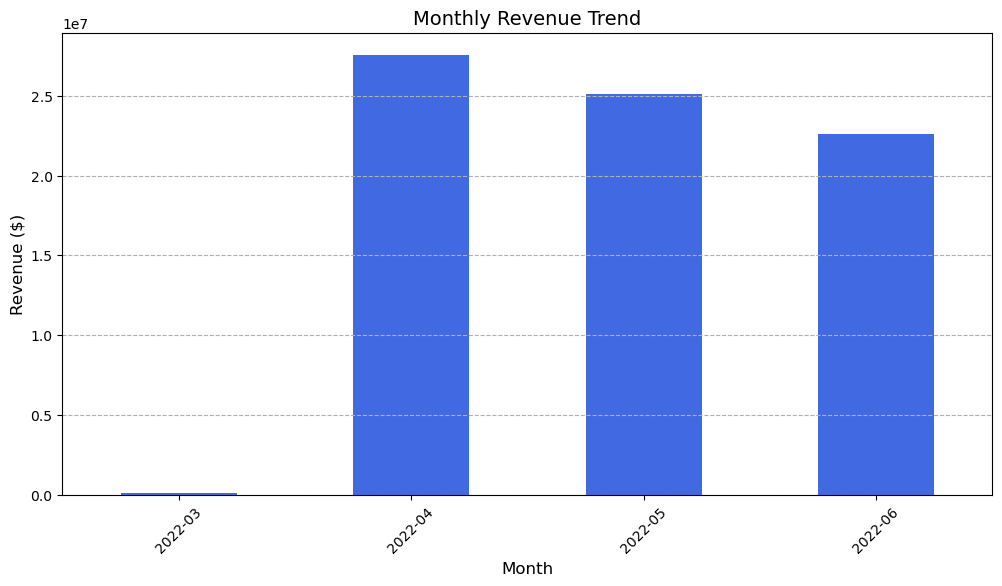

In [20]:
# Convert date and calculate monthly revenue
df1['date'] = pd.to_datetime(df1['date'])
monthly_sales = df1.groupby(df1['date'].dt.to_period('M'))['amount'].sum()

# Plot
plt.figure(figsize=(12,6))
monthly_sales.plot(kind='bar', color='royalblue')
plt.title('Monthly Revenue Trend', fontsize=14)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Revenue ($)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--')
plt.show()

In [21]:
# Growth calculation
growth = monthly_sales.pct_change().dropna().mean()
print(f"Average Monthly Growth Rate: {growth:.2%}")

Average Monthly Growth Rate: 9314.87%


                                                High-performing categories and underperformers

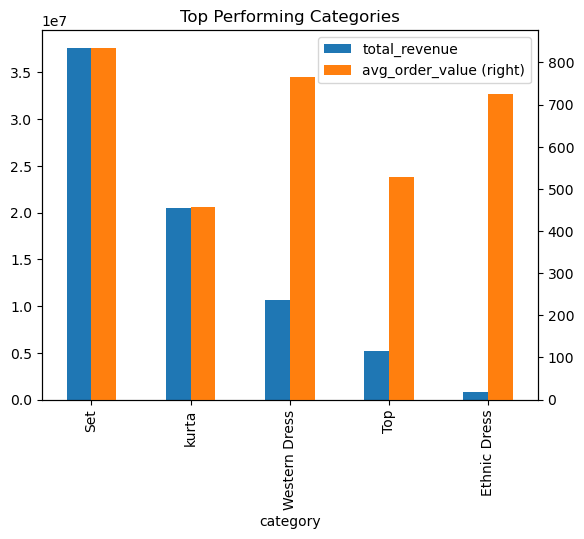

In [23]:
# Category analysis
category_perf = df1.groupby('category').agg(
    total_revenue=('amount', 'sum'),
    avg_order_value=('amount', 'mean'),
    order_count=('sku', 'count') ).sort_values('total_revenue', ascending=False)

# Pareto analysis
category_perf['revenue_pct'] = category_perf['total_revenue'].cumsum() / category_perf['total_revenue'].sum()

# Plot top categories
top_categories = category_perf.head(5)
top_categories[['total_revenue', 'avg_order_value']].plot(kind='bar', secondary_y='avg_order_value')
plt.title('Top Performing Categories')
plt.show()

In [24]:
print("Category Performance Insights:")
print(f"Top 3 categories contribute {category_perf['revenue_pct'].iloc[2]:.0%} of total revenue")
print(f"Most valuable category: {top_categories.index[0]} (${top_categories['avg_order_value'].iloc[0]:.2f} avg)")

Category Performance Insights:
Top 3 categories contribute 91% of total revenue
Most valuable category: Set ($835.28 avg)


                                      Identify top states/cities for targeted marketing

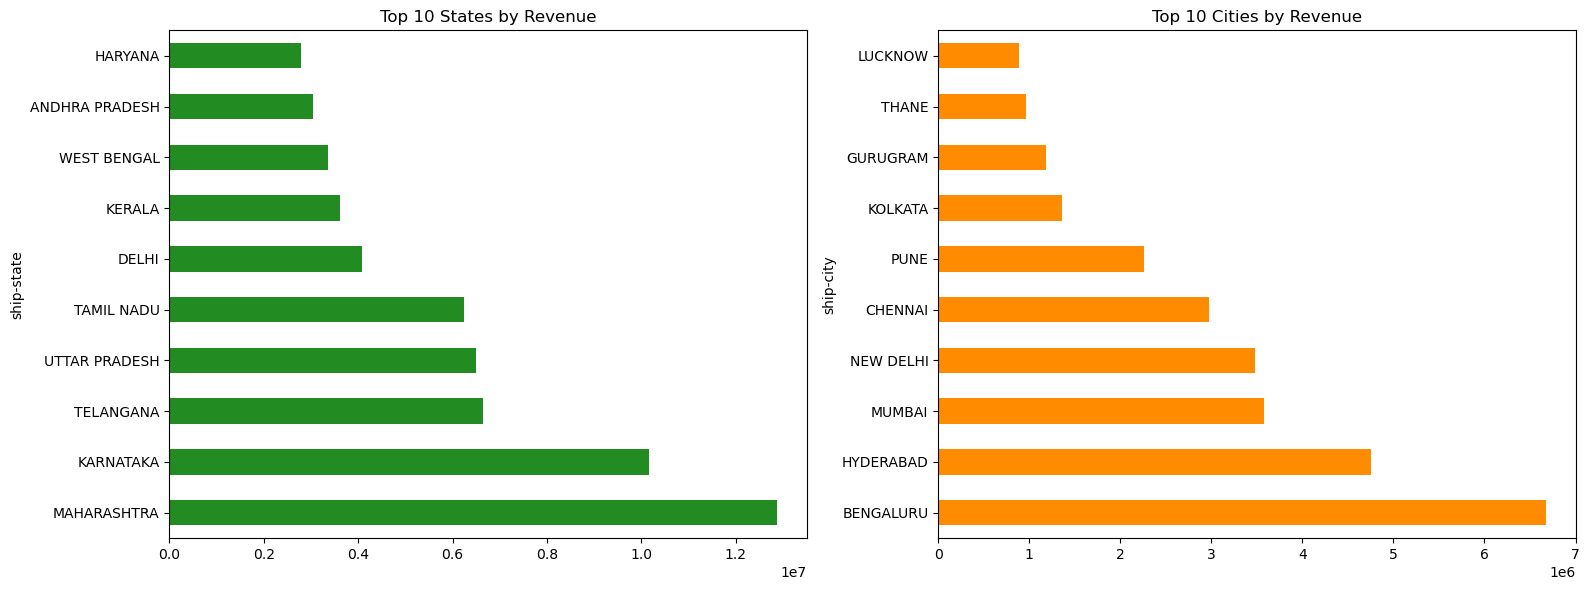

In [25]:
# State analysis
state_revenue = df1.groupby('ship-state')['amount'].sum().nlargest(10)
city_revenue = df1.groupby('ship-city')['amount'].sum().nlargest(10)

# Plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,6))
state_revenue.plot(kind='barh', ax=ax1, color='forestgreen')
ax1.set_title('Top 10 States by Revenue')
city_revenue.plot(kind='barh', ax=ax2, color='darkorange')
ax2.set_title('Top 10 Cities by Revenue')
plt.tight_layout()
plt.show()

In [27]:
# Opportunity analysis
potential_states = df1.groupby('ship-state')['amount'].sum().nsmallest(5)
print("\nUntapped Markets:")
print(potential_states)


Untapped Markets:
ship-state
PB             399.0
Rajsthan       443.0
AR             493.0
rajsthan       521.0
Pondicherry    529.0
Name: amount, dtype: float64


                                               Identify return patterns and problematic products

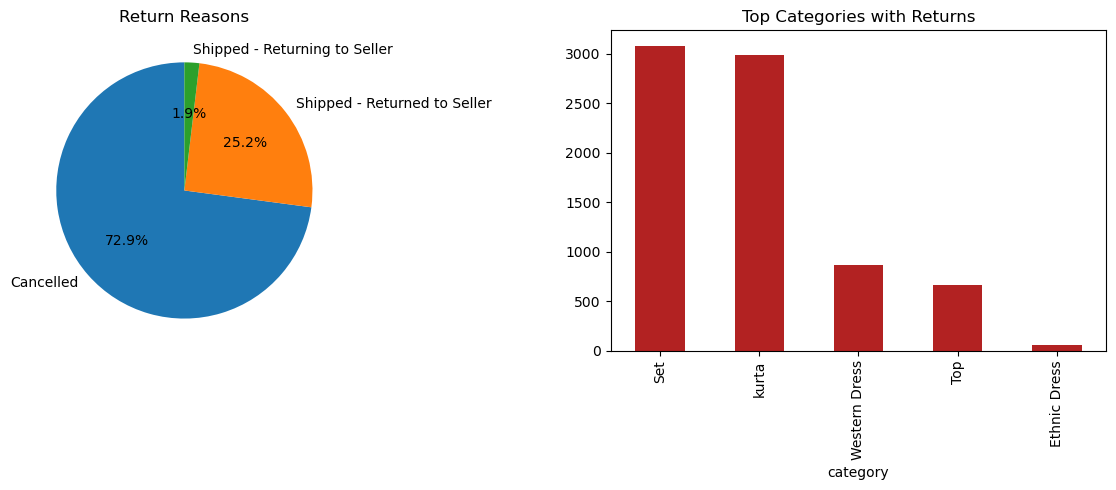

In [31]:
# Return analysis
return_analysis = df1[df1['status'].str.contains('Return|Cancel', case=False)]
return_reasons = return_analysis.groupby('status').size()
problem_products = return_analysis.groupby('category').size().nlargest(5)

# Plot
plt.figure(figsize=(12,5))
plt.subplot(121)
return_reasons.plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Return Reasons')
plt.subplot(122)
problem_products.plot(kind='bar', color='firebrick')
plt.title('Top Categories with Returns')
plt.tight_layout()
plt.show()

In [ ]:
  # one month sales analyses 

                      Which platform has the highest average list price differential compared to Amazon's selling price?

In [38]:
platforms = ['ajio_mrp', 'amazon_mrp', 'flipkart_mrp', 'limeroad_mrp', 
            'myntra_mrp', 'paytm_mrp', 'snapdeal_mrp']

In [39]:
# Calculate mean price difference vs Amazon selling price (tp)
platform_diff = {}
for platform in platforms:
    platform_diff[platform] = (df2[platform] - df2['tp']).mean() 

In [40]:
# Convert to sorted DataFrame
price_comparison = (pd.DataFrame(platform_diff.items(), columns=['Platform', 'Avg_Difference'])
                    .sort_values('Avg_Difference', ascending=False)) 

In [41]:
print("Platforms with Highest Markup vs Amazon Selling Price:")
print(price_comparison.head())

Platforms with Highest Markup vs Amazon Selling Price:
       Platform  Avg_Difference
1    amazon_mrp     1674.967517
2  flipkart_mrp     1670.298531
3  limeroad_mrp     1670.153132
0      ajio_mrp     1668.442382
6  snapdeal_mrp     1666.904872


                              Which categories offer the deepest discounts (Amazon selling price vs original MRP)?

In [67]:
df2['Discount_Pct'] = ((df2['mrp_old'] - df2['tp']) / df2['mrp_old']) * 100

category_discounts = (df2.groupby('category')['Discount_Pct']
                        .agg(['mean', 'count'])
                        .sort_values('mean', ascending=False)
                        .rename(columns={'mean':'Avg_Discount', 'count':'Products'}))

print("\nTop Discounted Categories:")
print(category_discounts.head())


Top Discounted Categories:
           Avg_Discount  Products
category                         
Tops          77.552587        45
Kurta         76.559575       802
Gown          76.036503        32
Kurta Set     68.338977       342


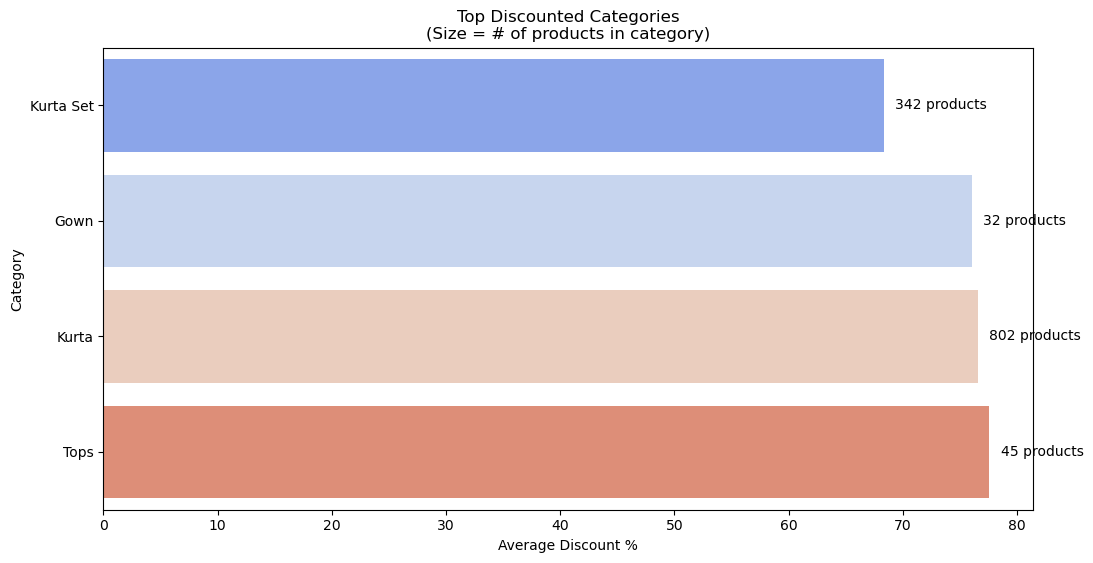

In [68]:
plt.figure(figsize=(12,6))
top_categories = category_discounts.head(10).sort_values('Avg_Discount')
sns.barplot(data=top_categories, y=top_categories.index, x='Avg_Discount', palette='coolwarm')

# Annotate with product counts
for i, (discount, count) in enumerate(zip(top_categories['Avg_Discount'], 
                                       top_categories['Products'])):
    plt.text(discount+1, i, f'{count} products', va='center')

plt.title('Top Discounted Categories\n(Size = # of products in category)')
plt.xlabel('Average Discount %')
plt.ylabel('Category')
plt.show()

                                  For products where Amazon is not the cheapest, what's the price gap?

In [45]:
# Identify cheapest platform per product
platform_cols = ['ajio_mrp','amazon_mrp','flipkart_mrp','myntra_mrp','snapdeal_mrp']
df2['Min_Platform_Price'] = df2[platform_cols].min(axis=1)
df2['Cheapest_Platform'] = df2[platform_cols].idxmin(axis=1).str.replace('_mrp','')

In [46]:
# Calculate Amazon's price disadvantage
amazon_not_cheapest = df2[df2['Cheapest_Platform'] != 'amazon']
amazon_not_cheapest['Price_Gap_Pct'] = ((amazon_not_cheapest['amazon_mrp'] - 
                                         amazon_not_cheapest['Min_Platform_Price']) / 
                                         amazon_not_cheapest['Min_Platform_Price']) * 100

In [47]:
# Top 5 products with biggest price gap
price_gap_products = (amazon_not_cheapest[['sku', 'category', 'Cheapest_Platform', 'Price_Gap_Pct']]
                      .sort_values('Price_Gap_Pct', ascending=False)
                      .head(5))

print("\nProducts Where Amazon Isn't Cheapest:")
print(price_gap_products)


Products Where Amazon Isn't Cheapest:
           sku category Cheapest_Platform  Price_Gap_Pct
552  Os168_3XL    Kurta              ajio       47.19764
549    Os168_L    Kurta              ajio       47.19764
548    Os168_M    Kurta              ajio       47.19764
547    Os168_S    Kurta              ajio       47.19764
550   Os168_XL    Kurta              ajio       47.19764


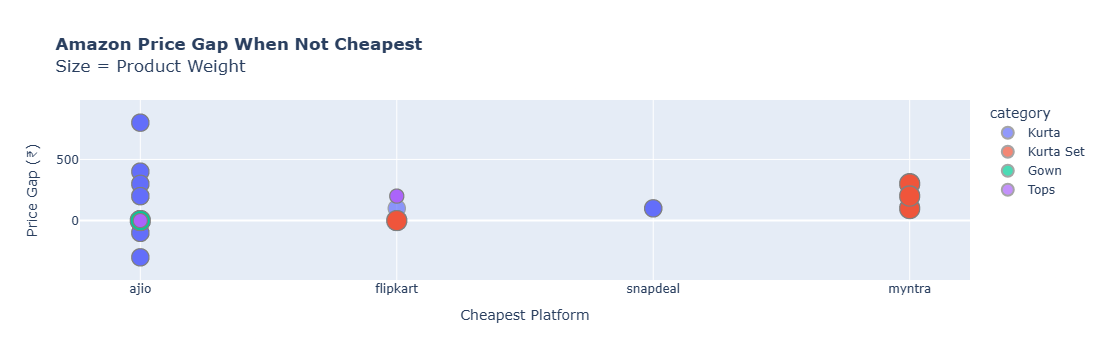

In [81]:
fig = px.scatter(
    non_cheapest,
    x='Cheapest_Platform',
    y='Price_Gap',
    color='category',
    size='weight',
    hover_data=['sku'],
    title='<b>Amazon Price Gap When Not Cheapest</b><br>Size = Product Weight'
)
fig.update_traces(marker=dict(opacity=0.7, line=dict(width=1, color='gray')))
fig.update_layout(xaxis_title='Cheapest Platform', yaxis_title='Price Gap (₹)')
fig.show()

In [31]:
# Inventory table (df3)

                                   Which categories/sizes account for 80% of our inventory value? (Pareto Analysis)

In [32]:
# Pareto by Category
from matplotlib.ticker import PercentFormatter
category_stock = df3.groupby('category')['stock'].sum().sort_values(ascending=False)
category_stock = category_stock.reset_index()
category_stock['cum_pct'] = category_stock['stock'].cumsum()/category_stock['stock'].sum()*100

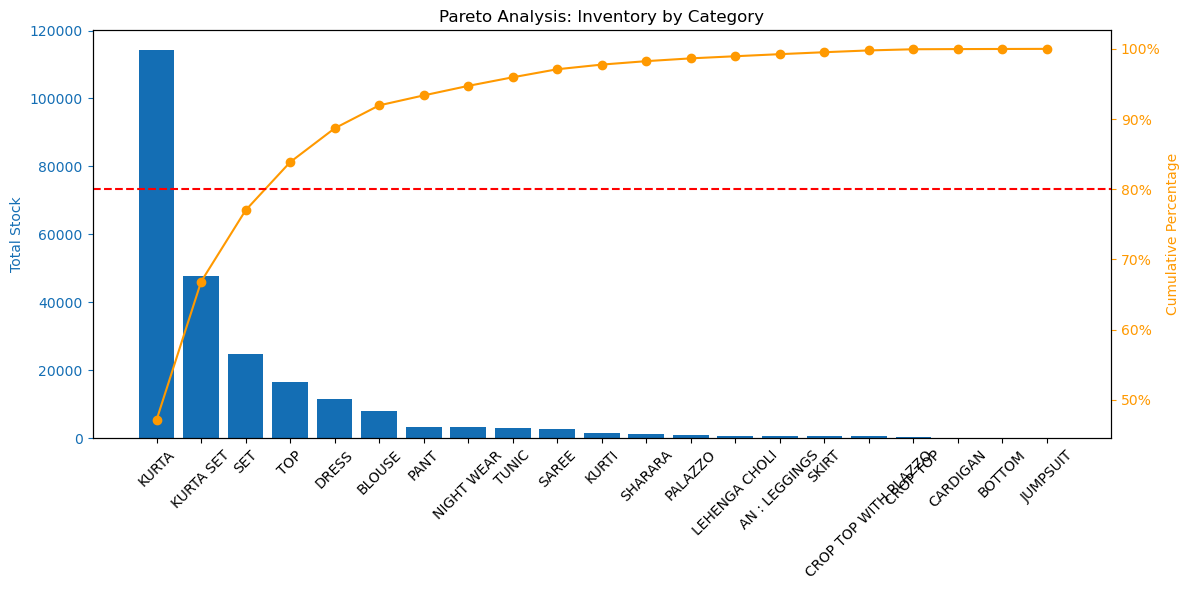

In [33]:
# Visualization
fig, ax1 = plt.subplots(figsize=(12,6))
ax1.bar(category_stock['category'], category_stock['stock'], color='#146EB4')
ax1.set_ylabel('Total Stock', color='#146EB4')
ax1.tick_params(axis='y', colors='#146EB4')
ax1.tick_params(axis='x', rotation=45)

ax2 = ax1.twinx()
ax2.plot(category_stock['category'], category_stock['cum_pct'], color='#FF9900', marker='o')
ax2.yaxis.set_major_formatter(PercentFormatter())
ax2.axhline(80, color='red', linestyle='--')
ax2.set_ylabel('Cumulative Percentage', color='#FF9900')
ax2.tick_params(axis='y', colors='#FF9900')

plt.title('Pareto Analysis: Inventory by Category')
plt.tight_layout()
plt.show()

                                  Is there a trade-off between product variety (SKU count) and inventory depth?

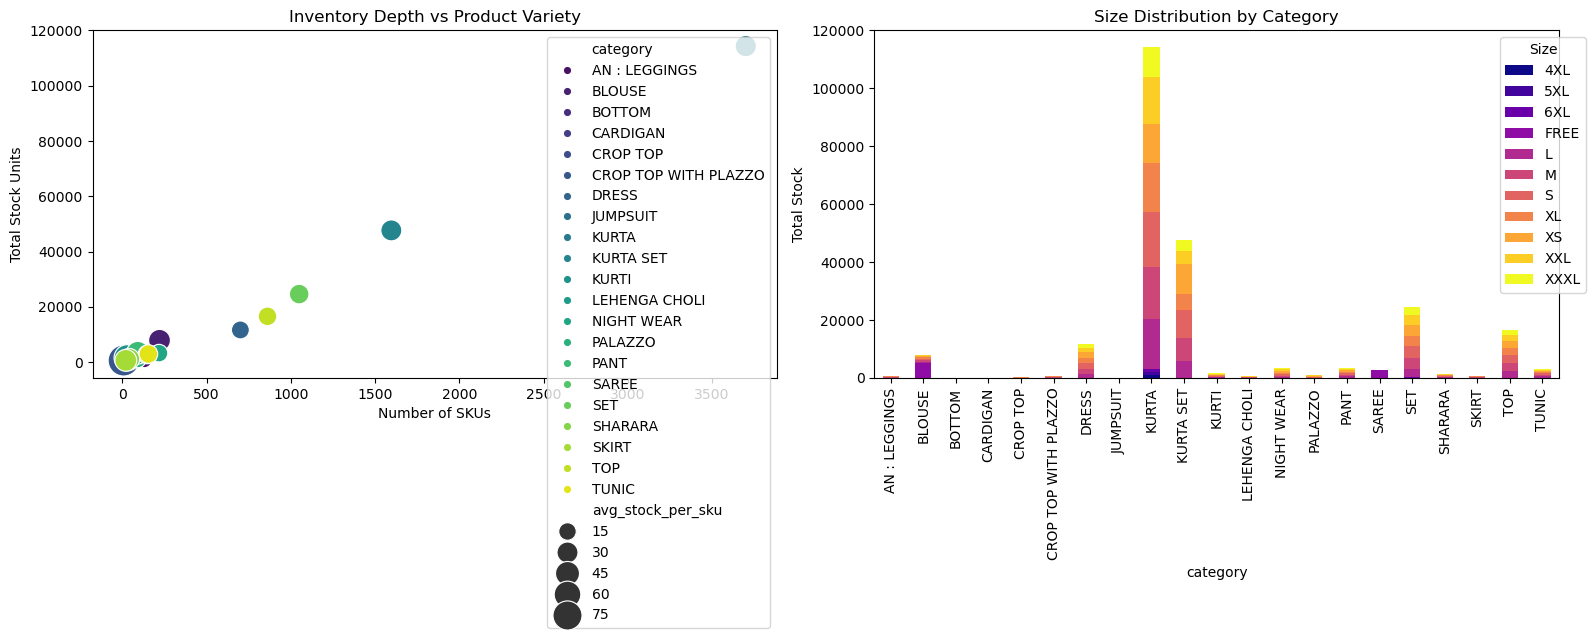

In [92]:
# Calculate metrics per category
category_analysis = df3.groupby('category').agg(
    total_stock=('stock', 'sum'),
    sku_count=('sku_code', 'nunique'),
    avg_stock_per_sku=('stock', 'mean')
).reset_index()

# Visualization
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,6))

# SKU Count vs Total Stock
sns.scatterplot(data=category_analysis, 
                x='sku_count', 
                y='total_stock', 
                size='avg_stock_per_sku',
                hue='category',
                sizes=(100, 500),
                palette='viridis',
                ax=ax1)
ax1.set_title('Inventory Depth vs Product Variety')
ax1.set_xlabel('Number of SKUs')
ax1.set_ylabel('Total Stock Units')

# Size-Color Distribution
sizes = df3.groupby(['category','size'])['stock'].sum().unstack().fillna(0)
sizes.plot(kind='bar', stacked=True, ax=ax2, colormap='plasma')
ax2.set_title('Size Distribution by Category')
ax2.set_ylabel('Total Stock')
ax2.legend(title='Size', bbox_to_anchor=(1.05, 1))

plt.tight_layout()
plt.show()

                               What are the inventory distributions across size-color combinations?

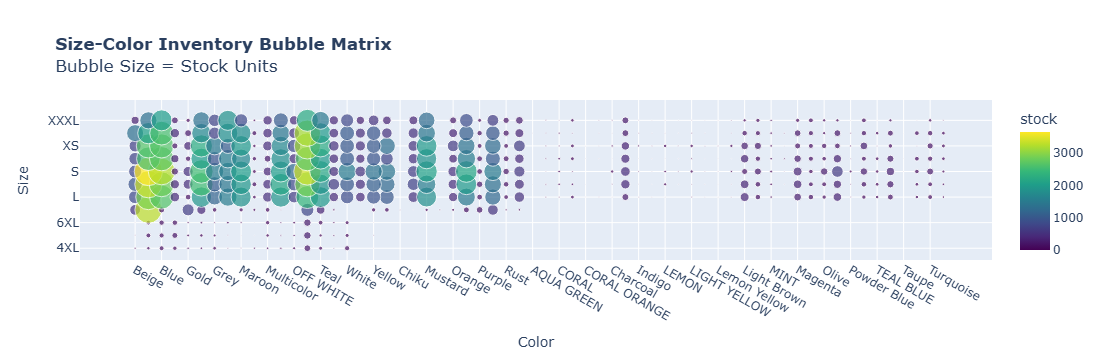

In [93]:
# Aggregate data
size_color = df3.groupby(['size', 'color'])['stock'].sum().reset_index()

fig = px.scatter(
    size_color,
    x='color',
    y='size',
    size='stock',
    color='stock',
    color_continuous_scale='Viridis',
    hover_name='stock',
    title='<b>Size-Color Inventory Bubble Matrix</b><br>Bubble Size = Stock Units'
)

fig.update_layout(
    xaxis_title='Color',
    yaxis_title='Size',
    hovermode='closest',
    height=600
)
fig.show()

This project involved deep analysis of sales, pricing, and inventory data for an e-commerce business, delivering critical insights for strategic decision-making. In May, the company recorded its highest monthly revenue, with 'Sets' generating the most income, followed by 'Western Dresses', 'Kurtas', and 'Tops'. Revenue concentration was geographically focused, with Maharashtra and Bengaluru being top-performing regions.

A significant concern identified was the high return rate, especially in 'Sets' and 'Kurtas', driven mainly by cancellations, highlighting a need to investigate quality, delivery, or customer experience issues.

In the pricing analysis, Amazon MRP was found to be slightly higher than others, but not drastically so. However, 'Kurtas' and 'Gowns' had the highest average discounts, around 77%, with over 800 discounted products in the kurta category alone. Ajio emerged as the most affordable platform, offering kurtas at a price gap of ₹47 compared to others.

Inventory analysis revealed an overstock situation, with 'Kurtas', 'Kurta Sets', and 'Sets' dominating—holding 10 lakh, 4 lakh, and 2 lakh units respectively. Most kurta stock is medium-sized, followed by XL. These insights suggest a need for better stock optimization, focused marketing on top-performing regions, and deeper analysis of return reasons to reduce cancellations and improve profitability.

                                       Importing Data into mysql workbench for more datail analyses 

In [94]:
from sqlalchemy import create_engine
import urllib.parse

In [108]:
# credentials
username = "root"
host = "localhost"
port = 3306
database = "ecommerse"

# SQLAlchemy engine
engine = create_engine(f"mysql+mysqlconnector://{username}:{password}@{host}:{port}/{database}")

# Upload DataFrame
df1.to_sql(name='monthly_sales', con=engine, if_exists='replace', index=False)
df2.to_sql(name='monthly_sales', con=engine, if_exists='replace', index=False)
df3.to_sql(name='inventory', con=engine, if_exists='replace', index=False)

print("✅ Data uploaded to MySQL successfully.")


✅ Data uploaded to MySQL successfully.


In [ ]:
# cleaned and modifyied data into csv formate

In [113]:
df1.to_csv('amazon_sale', index=False)
df2.to_csv('month_sale', index=False)
df3.to_csv('inventory', index=False)